In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = {
    'StudentID': [101, 102, 103, 104, 105],
    'Gender': ['Male', 'Female', np.nan, 'Male', 'Female'],
    'Course': ['B.Tech', 'B.Sc', 'B.Com', 'B.Tech', 'B.Sc'],
    'Age': [21, np.nan, 20, 22, 19],
    'Marks': [88, 92, np.nan, 76, 85],
    'Behavior': ['Active', 'Inactive', 'Active', 'Inactive', 'Active']
    
}

In [7]:
df=pd.DataFrame(data)
print(df)

   StudentID  Gender  Course   Age  Marks  Behavior
0        101    Male  B.Tech  21.0   88.0    Active
1        102  Female    B.Sc   NaN   92.0  Inactive
2        103     NaN   B.Com  20.0    NaN    Active
3        104    Male  B.Tech  22.0   76.0  Inactive
4        105  Female    B.Sc  19.0   85.0    Active


In [9]:
x=SimpleImputer(strategy='mean')
df[['Age','Marks']]=x.fit_transform(df[['Age','Marks']])

In [11]:
print(df)

   StudentID  Gender  Course   Age  Marks  Behavior
0        101    Male  B.Tech  21.0  88.00    Active
1        102  Female    B.Sc  20.5  92.00  Inactive
2        103     NaN   B.Com  20.0  85.25    Active
3        104    Male  B.Tech  22.0  76.00  Inactive
4        105  Female    B.Sc  19.0  85.00    Active


In [13]:
y=SimpleImputer(strategy='most_frequent')
df[['Gender']]=y.fit_transform(df[['Gender']])

In [15]:
print(df)

   StudentID  Gender  Course   Age  Marks  Behavior
0        101    Male  B.Tech  21.0  88.00    Active
1        102  Female    B.Sc  20.5  92.00  Inactive
2        103  Female   B.Com  20.0  85.25    Active
3        104    Male  B.Tech  22.0  76.00  Inactive
4        105  Female    B.Sc  19.0  85.00    Active


In [17]:
x=LabelEncoder()
df['Gender']=x.fit_transform(df['Gender'])
df['Behavior']=x.fit_transform(df['Behavior'])
print(df)

   StudentID  Gender  Course   Age  Marks  Behavior
0        101       1  B.Tech  21.0  88.00         0
1        102       0    B.Sc  20.5  92.00         1
2        103       0   B.Com  20.0  85.25         0
3        104       1  B.Tech  22.0  76.00         1
4        105       0    B.Sc  19.0  85.00         0


In [19]:
z=df.select_dtypes(include='number')
abc=z.corr()
print(abc)

           StudentID    Gender       Age     Marks  Behavior
StudentID   1.000000 -0.288675 -0.353553 -0.590617  0.000000
Gender     -0.288675  1.000000  0.816497 -0.503740  0.166667
Age        -0.353553  0.816497  1.000000 -0.460342  0.612372
Marks      -0.590617 -0.503740 -0.460342  1.000000 -0.193746
Behavior    0.000000  0.166667  0.612372 -0.193746  1.000000


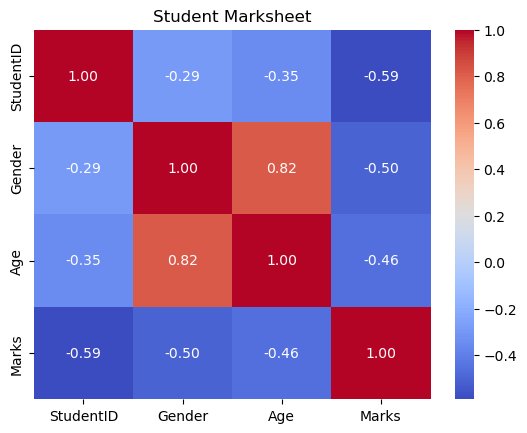

In [21]:
# Correlation heatmap
sns.heatmap(df[['StudentID', 'Gender', 'Age', 'Marks']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Student Marksheet')
plt.show()

In [23]:
df = pd.get_dummies(df, columns=['Course'], prefix='Course')
print(df)

   StudentID  Gender   Age  Marks  Behavior  Course_B.Com  Course_B.Sc  \
0        101       1  21.0  88.00         0         False        False   
1        102       0  20.5  92.00         1         False         True   
2        103       0  20.0  85.25         0          True        False   
3        104       1  22.0  76.00         1         False        False   
4        105       0  19.0  85.00         0         False         True   

   Course_B.Tech  
0           True  
1          False  
2          False  
3           True  
4          False  
